In [4]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import pandas as pd

2023-04-19 14:30:17.948064: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 14:30:18.120967: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-19 14:30:18.819373: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dnlab/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-04-19 14:30:18.

In [5]:
class_names = ['drinking', 'driving', 'falling_asleep', 'turning_around', 'using_cellphone']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

print(class_names_label)
print(nb_classes)

{'drinking': 0, 'driving': 1, 'falling_asleep': 2, 'turning_around': 3, 'using_cellphone': 4}
5


In [6]:
def load_data():
    datasets = ['/home/dnlab/Data-B/data/main_data/train_cat_new', '/home/dnlab/Data-B/data/main_data/val_cat_new']
    output = []

    for dataset in datasets:
        images = []
        labels = []

        print('Loading {}'.format(dataset))
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            # iter through each imag in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output

In [7]:
(train_images, train_labels), (test_images, test_labels) = load_data()

print(test_labels)

Loading /home/dnlab/Data-B/data/main_data/train_cat_new


100%|██████████| 3418/3418 [00:02<00:00, 1292.11it/s]


Loading /home/dnlab/Data-B/data/main_data/val_cat_new


100%|██████████| 331/331 [00:00<00:00, 1463.18it/s]


[2 2 2 ... 3 3 3]


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=8, epochs=20, validation_split = 0.1)

2023-04-19 14:30:40.992618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5721 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:73:00.0, compute capability: 8.6


Epoch 1/20


2023-04-19 14:30:48.248432: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-04-19 14:30:50.005491: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2039/2039 [==============================] - 30s 12ms/step - loss: 1.8198 - accuracy: 0.5678 - val_loss: 1.4300 - val_accuracy: 0.4744
Epoch 2/20
2039/2039 [==============================] - 23s 11ms/step - loss: 0.6787 - accuracy: 0.7547 - val_loss: 0.9914 - val_accuracy: 0.6569
Epoch 3/20
2039/2039 [==============================] - 23s 11ms/step - loss: 0.4636 - accuracy: 0.8331 - val_loss: 1.1026 - val_accuracy: 0.6773
Epoch 4/20
2039/2039 [==============================] - 23s 11ms/step - loss: 0.3394 - accuracy: 0.8791 - val_loss: 1.0109 - val_accuracy: 0.7419
Epoch 5/20
2039/2039 [==============================] - 23s 11ms/step - loss: 0.2670 - accuracy: 0.9059 - val_loss: 1.2073 - val_accuracy: 0.7275
Epoch 6/20
2039/2039 [==============================] - 23s 11ms/step - loss: 0.2207 - accuracy: 0.9254 - val_loss: 1.1221 - val_accuracy: 0.7772
Epoch 7/20
2039/2039 [==============================] - 23s 11ms/step - loss: 0.1786 - accuracy: 0.9402 - val_loss: 1.2823 - val_accura

In [9]:
test_loss = model.evaluate(test_images, test_labels)

12/62 [====>.........................] - ETA: 0s - loss: 1.2828 - accuracy: 0.8568

2023-04-19 14:38:50.861882: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 532.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-19 14:38:50.862028: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 532.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-19 14:38:50.871292: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 226.58MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-19 14:38:50.871407: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocato

62/62 [==============================] - 1s 11ms/step - loss: 1.4140 - accuracy: 0.8762


2023-04-19 14:38:51.523301: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 451.38MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-19 14:38:51.523419: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 451.38MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-19 14:38:51.529151: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 226.58MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-19 14:38:51.529234: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocato

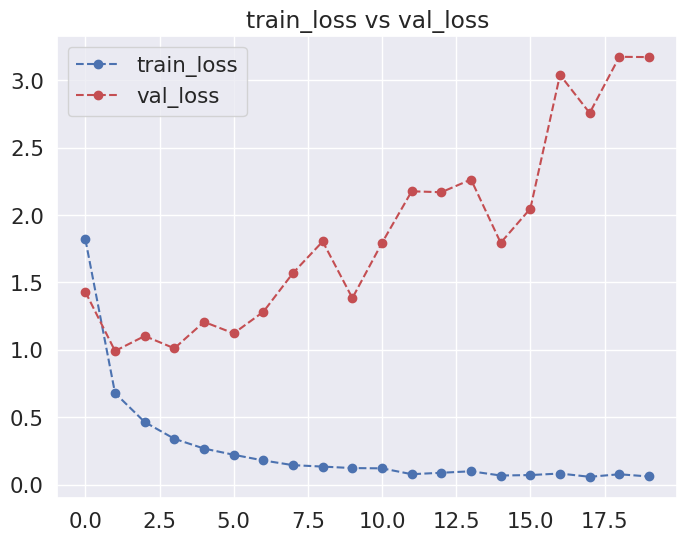

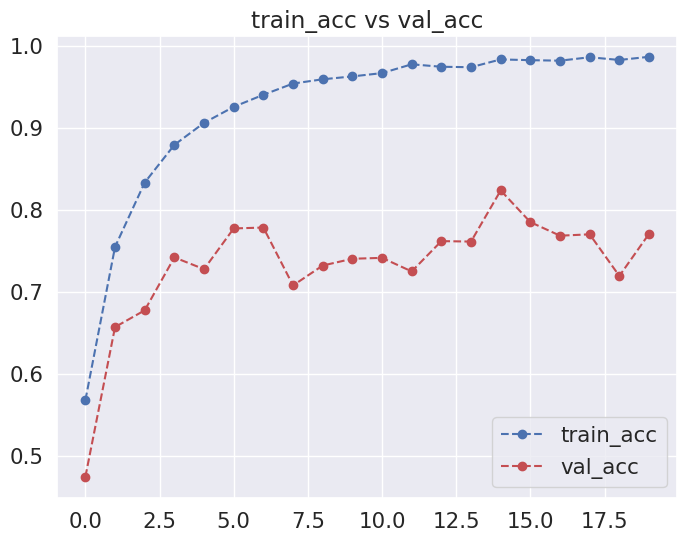

In [10]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    # Plot loss
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(history.history['loss'],'bo--', label = "train_loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.legend()
    
    # Plot accuracy
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(history.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    
    plt.legend()
    plt.show()

# Plot accuracy and loss graphs
plot_accuracy_loss(history)


In [11]:
from sklearn.metrics import f1_score

test_predictions = model.predict(test_images)
y_preds = np.argmax(test_predictions, axis=1) # Convert probabilities to class labels
test_f1_score = f1_score(test_labels, y_preds, average='macro')
print('Test F1 score:', test_f1_score)

62/62 [==============================] - 1s 8ms/step
Test F1 score: 0.8731313296773224


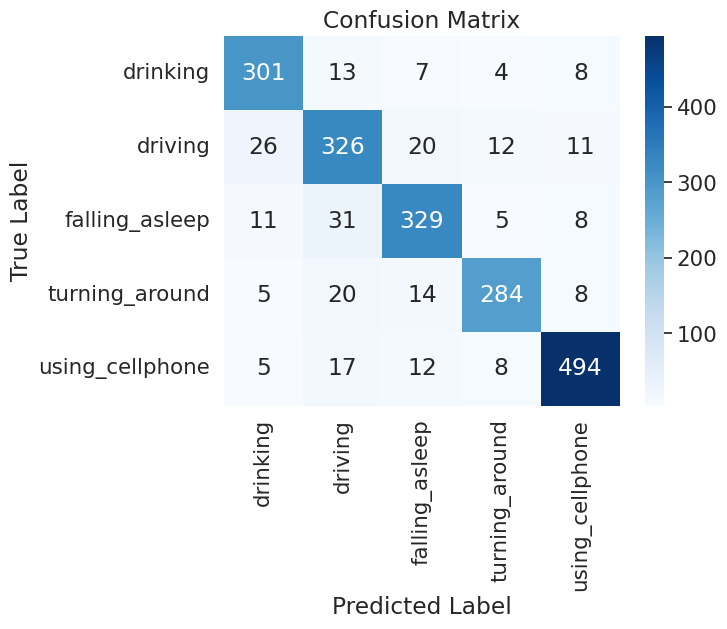

In [12]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_mat = confusion_matrix(test_labels, y_preds)


# Plot the confusion matrix using seaborn heatmap
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='g', 
            xticklabels=class_names, yticklabels=class_names)

# Set the plot title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoded format
y_test = label_binarize(test_labels, classes=[0, 1, 2, 3, 4])
y_pred = label_binarize(y_preds, classes=[0, 1, 2, 3, 4])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'yellow', 'orange']
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'test_labels' is not defined

In [13]:
def display_examples(class_names, images, true_labels, predicted_labels=None):
    """
    Display 25 images from the images array with their corresponding labels and predicted labels
    """
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if predicted_labels is None:
            plt.xlabel(class_names[true_labels[i]])
        else:
            true_label = class_names[true_labels[i]]
            predicted_label = class_names[np.argmax(predicted_labels[i])]
            if true_label == predicted_label:
                color = 'green'
            else:
                color = 'red'
            plt.xlabel(f"True:{true_label}\nPred:{predicted_label}", color=color, fontsize=8)
    plt.show()

train_images = train_images / 255.0 
test_images = test_images / 255.0


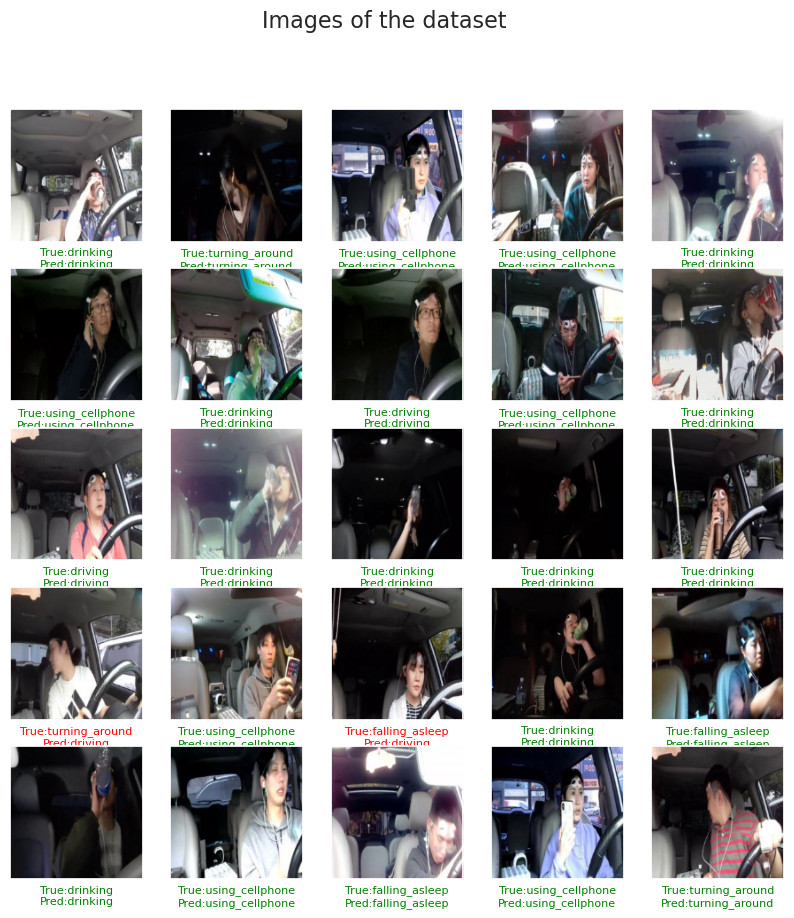

In [14]:
import numpy as np

# Select 25 random images and their corresponding labels
indices = np.random.choice(len(test_images), size=25, replace=False)
images_to_plot = test_images[indices]
true_labels = test_labels[indices]
predicted_labels = test_predictions[indices]

# Display the selected images with their true and predicted labels
display_examples(class_names, images_to_plot, true_labels, predicted_labels)